# [`generate_parray`](https://github.com/ocelot-collab/ocelot/blob/master/ocelot/cpbd/beam.py#L2210)

The `generate_parray` function is a versatile tool for creating a [`ParticleArray`](../OCELOT%20fundamentals/particle-array.md) object, which represents a collection of particles. This is essential for initializing beam distributions for simulations, analysis, or theoretical studies within OCELOT.
It allows for specification of various particle distribution parameters, defaulting to a 6D Gaussian distribution, but also supporting other standard shapes and user-defined custom longitudinal profiles.

---

### Synopsis
```python
ocelot.cpbd.beam.generate_parray(
    sigma_x   = 1e-4,
    sigma_px  = 2e-5,
    sigma_y   = None,
    sigma_py  = None,
    sigma_tau = 1e-3,
    sigma_p   = 1e-4,
    chirp     = 0.01,
    charge    = 5e-9,
    nparticles= 200_000,
    energy    = 0.13,
    tau_trunc = None,
    tws       = None,
    shape     = "gauss"
) -> ParticleArray
```

## Parameters

| Parameter    | Type                    | Default  | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|--------------|------------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `sigma_x`    | `float`              | `1e-4`   | RMS beam size in the horizontal coordinate `x` (m).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| `sigma_px`   | `float`              | `2e-5`   | RMS beam divergence in horizontal canonical momentum `px/p0` (unitless).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| `sigma_y`    | `float` or `None`    | `None`   | RMS beam size in the vertical coordinate `y` (m). Defaults to `sigma_x` if `None` (and `tws` is not provided).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| `sigma_py`   | `float` or `None`    | `None`   | RMS beam divergence in vertical canonical momentum `py/p0` (unitless). Defaults to `sigma_px` if `None` (and `tws` is not provided).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| `sigma_tau`  | `float`              | `1e-3`   | RMS bunch length in the longitudinal coordinate `tau = c*t` (m). Note: `tau > 0` is the head of the bunch. Used to scale predefined shapes (`"gauss"`, `"tri"`, `"rect"`) and for chirp calculation.                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| `sigma_p`    | `float`              | `1e-4`   | RMS relative energy deviation `(E - E0) / p0c`. Can be overridden if `tws` is provided and `tws.pp` is non-zero (see `tws` parameter).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| `chirp`      | `float`              | `0.01`   | Linear energy chirp (unitless). Applies a correlation: `p_i_final = p_i_initial + chirp * tau_i / sigma_tau`. Applied only if `sigma_tau` is not zero.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| `charge`     | `float`              | `5e-9`   | Total beam charge (Coulombs).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| `nparticles` | `int`                | `200000` | Number of macro-particles in the distribution.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| `energy`     | `float`              | `0.13`   | Reference beam energy (GeV), i.e., `E0`. Can be overridden if `tws` is provided and `tws.E` is non-zero.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| `tau_trunc`  | `float` or `None`    | `None`   | Truncation factor for the longitudinal Gaussian distribution (`shape="gauss"`). If `None`, defaults to `5`. The distribution is generated in `[-tau_trunc * sigma_tau, tau_trunc * sigma_tau]`. For other shapes, truncation is defined by the shape's s-coordinate range.                                                                                                                                                                                                                                                                                                                                                                      |
| `tws`        | `Twiss` or `None`    | `None`   | [Twiss](../OCELOT%20fundamentals/twiss.md) parameters object. If a `Twiss` object is provided **and** its `emit_x, emit_y, beta_x, beta_y, gamma_x, gamma_y` attributes are all non-zero, it defines the transverse beam properties. This overrides `sigma_x, sigma_px, sigma_y, sigma_py`. The transverse distribution is then generated using `np.random.multivariate_normal` and further refined by `beam_matching` to precisely match the Twiss parameters. Additionally: <br/> - If `tws.E` is non-zero, it overrides the `energy` parameter. <br/> - If `tws.pp` is non-zero, `sigma_p` is set to `sqrt(tws.pp)`. (`pp` is assumed to be `sigma_p^2`). |
| `shape`      | `str` or `[s, f(s)]` | `"gauss"`| Longitudinal current profile shape. Particles are sampled using an inverted CDF method based on this profile. <br/> - Supported strings: `"gauss"`, `"tri"` (triangular), `"rect"` (rectangular/flat-top). These use `sigma_tau` to define their extent. <br/> - Custom profile: `[s, f(s)]` where `s` is an array of longitudinal positions (m) and `f(s)` is the corresponding current/density.                                                                                                                                                                                                                                               |

---

## Returns

- [`ParticleArray`](../OCELOT%20fundamentals/particle-array.md): An OCELOT `ParticleArray` object representing the generated particle distribution.

---
## Example Usage

### 1. Using default values
This example generates a particle array with default parameters, resulting in a 6D Gaussian distribution.


In [2]:
import sys
sys.path.append("/Users/tomins/Nextcloud/DESY/repository/ocelot")
from ocelot.cpbd.beam import generate_parray
parray = generate_parray()
print(parray)

initializing ocelot...
ParticleArray: 
Ref. energy : 0.13 GeV 
Ave. energy : 0.13 GeV 
std(x)      : 0.1 mm
std(px)     : 0.02 mrad
std(y)      : 0.1 mm
std(py)     : 0.02 mrad
std(p)      : 0.01
std(tau)    : 0.999 mm
Charge      : 5.0 nC 
s pos       : 0.0 m 
n particles : 200000



Twiss parameters of the generated distribution can be calculated:

Note: Expected output (actual values may vary slightly due to random sampling):

In [3]:
print(parray.get_twiss())

emit_x  = 2.0047197807088e-09
emit_y  = 2.0048157030825804e-09
emit_xn  = 5.100041797972257e-07
emit_yn  = 5.100285826150334e-07
beta_x  = 4.994335333853261
beta_y  = 4.986264209140136
alpha_x = -0.002012054559353829
alpha_y = 0.0028608621340389124
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.13
s        = 0.0



### 2. Generate ParticleArray from Twiss parameters

To generate a distribution that matches specific lattice [Twiss](../OCELOT%20fundamentals/twiss.md) parameters, use the `tws` argument.

It is generally recommended to provide a [`Twiss`](../OCELOT%20fundamentals/twiss.md) object with defined emittances — either geometric (`emit_x`, `emit_y`) or normalized (`emit_xn`, `emit_yn`).
If using normalized emittances, make sure the beam `energy` (`E`) is correctly specified in the [Twiss](../OCELOT%20fundamentals/twiss.md) object, as it is essential for converting to geometric emittance internally.

When all relevant Twiss attributes (`emit_x`, `emit_y`, `beta_x`, `beta_y`, `gamma_x`, `gamma_y`) are non-zero, they take precedence in determining the transverse beam properties.

Additionally, the beam `energy` and `sigma_p` can be overridden via `tws.E` and `tws.pp`, respectively.

In [2]:
from ocelot.cpbd.beam import Twiss, generate_parray

# Define Twiss parameters
tws0 = Twiss(emit_xn=0.3e-6, emit_yn=0.7e-6, beta_x=10, alpha_x=-1, beta_y=7, alpha_y=1.3, E=0.5)
# If you want tws to define sigma_p, set tws0.pp, e.g., tws0.pp = (5e-4)**2

parray_from_tws = generate_parray(
    tws=tws0,
    charge=250e-12,
    nparticles=100_000,
    sigma_tau=5e-3,  # Longitudinal sigma_tau
    sigma_p=5e-4,    # Default sigma_p, overridden if tws0.pp is set
    shape="gauss",    # Longitudinal shape
    energy=1         # despite energy is define also here, it will be overrides by energy in Twiss object
)

print(f"Reference energy used: {parray_from_tws.E} GeV")
print(parray_from_tws.get_twiss())

[INFO    ] Twiss parameters have priority. sigma_{x, px, y, py} will be redefined


Reference energy used: 0.5 GeV
emit_x  = 3.0689589336837374e-10
emit_y  = 7.15089446028782e-10
emit_xn  = 3.002900327281652e-07
emit_yn  = 6.996973168806738e-07
beta_x  = 10.000184452346401
beta_y  = 6.999384746018024
alpha_x = -0.9998838045047547
alpha_y = 1.299829019310836
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.5
s        = 0.0



### 3. Generate particle distribution with an arbitrary longitudinal shape
The longitudinal current profile can be a standard shape or a custom one defined by `[tau, f(tau)]`.

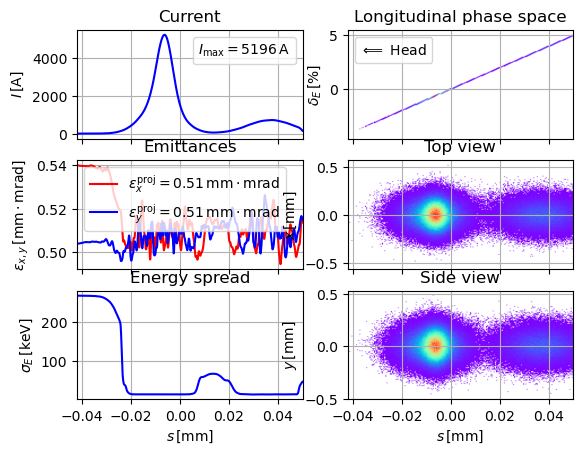

In [4]:
import numpy as np
from ocelot.cpbd.beam import generate_parray
from ocelot.gui.accelerator import show_e_beam
import matplotlib.pyplot as plt

# Define an effective overall length for the custom shape
sigma_tau_ref = 10e-6

# Parameters for a custom shape (e.g., sum of Gaussians)
A1, A2, A3 = 0.5, 0.2, 1.0
mu1, mu2, mu3 = -0.77 * sigma_tau_ref, 3.7 * sigma_tau_ref, -0.63 * sigma_tau_ref
sigma1, sigma2, sigma3 = 0.72 * sigma_tau_ref, 0.92 * sigma_tau_ref, 0.3 * sigma_tau_ref

f_custom = lambda x_val: (A1 * np.exp(-(x_val - mu1)**2 / (2 * sigma1**2)) +
                          A2 * np.exp(-(x_val - mu2)**2 / (2 * sigma2**2)) +
                          A3 * np.exp(-(x_val - mu3)**2 / (2 * sigma3**2)))

tau_coords = np.linspace(-5 * sigma_tau_ref, 5 * sigma_tau_ref, num=300)
custom_profile = [tau_coords, f_custom(tau_coords)]

parray_custom = generate_parray(
    sigma_x=1e-4, sigma_px=2e-5,
    sigma_tau=sigma_tau_ref, # Used for chirp calc and as a general scale
    sigma_p=1e-4,
    chirp=0.01,
    charge=250e-12,
    nparticles=500_000,
    energy=0.13,
    shape=custom_profile
)

show_e_beam(parray_custom)
plt.show()

## Notes

-   **Coordinate System & Definitions:**
    -   can be found in [Ocelot Coordinate System](../OCELOT%20fundamentals/coordinate_system.md)
-   **Twiss Parameter Handling:**
    -   If a `tws` object is provided and its core transverse attributes (`emit_x, emit_y, beta_x, beta_y, gamma_x, gamma_y`) are all non-zero, it dictates the transverse particle distribution.
    -   The `energy` parameter for the [`ParticleArray`](../OCELOT%20fundamentals/particle-array.md) will be taken from `tws.E` if `tws.E` is non-zero.
    -   The `sigma_p` for generating energy spread will be `sqrt(tws.pp)` if `tws.pp` is non-zero. (`pp` in the [`Twiss`](../OCELOT%20fundamentals/twiss.md) object is assumed to represent `sigma_p_squared`).
    -   After initial generation from Twiss parameters, a `beam_matching` routine is internally called to further refine the particle coordinates, ensuring the resulting distribution's Twiss parameters (alpha, beta, emittance) and phase space orientation closely match the input `tws` object. This includes removing any spurious offsets.
-   **Chirp Application:** The `chirp` introduces `p_final = p_initial + chirp * tau / sigma_tau`. `sigma_tau` here is the input parameter, acting as the scaling factor for the chirp, even if `shape` is custom.
-   **Longitudinal Shapes & `sigma_tau`:**
    -   For predefined shapes (`"gauss"`, `"tri"`, `"rect"`), the input `sigma_tau` defines their characteristic length and the range over which particles are generated.
    -   For custom `shape=[tau, f(tau)]`, the `tau` array directly defines the longitudinal extent. The input `sigma_tau` is primarily used for the chirp calculation. The actual RMS bunch length (`std(tau)`) will be determined by the custom profile itself.
    -   Particles are sampled longitudinally according to the specified `shape` using an inverted Cumulative Distribution Function (CDF) method.

---